# Fundamentals of Statistics

## Data

The dataset we use here is taken from this [paper](https://www.nature.com/articles/sdata201919) which studies life expectancy of hundards of animals from North American zoos and aquariums. We start by importing the required modules/packages/libraries. Then we read in the data which is a csv file and look at the first five rows of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
zooanimals = pd.read_csv("Data/AZA_MLE_Jul2018.csv", encoding='latin-1')
zooanimals.head()

,Species Common Name,Scientific Name,TaxonClass,Overall Sample Size,Overall MLE,Overall CI - lower,Overall CI - upper,Male Sample Size,Male MLE,Male CI - lower,Male CI - upper,Female Sample Size,Female MLE,Female CI - lower,Female CI - upper,Male Data Deficient,Female Data Deficient
0,Addax,Addax nasomaculatus,Mammalia,1215.0,13.4,12.4,14.5,558.0,12.3,10.5,14.7,656.0,14.4,13.0,15.1,NaN,NaN
1,"Agouti, Brazilian",Dasyprocta leporina,Mammalia,456.0,8.1,7.2,9.3,216.0,8.8,6.9,10.3,220.0,7.8,6.8,8.6,NaN,NaN
2,"Alligator, Chinese",Alligator sinensis,Reptilia,351.0,30.9,25.9,34.3,151.0,25.9,23.9,52.1,176.0,32.8,25.9,46,yes,yes
3,"Anoa, Lowland",Bubalus depressicornis,Mammalia,256.0,17.7,15.3,21.2,113.0,16.3,14.7,21.3,139.0,18.8,15.2,21.5,yes,yes
4,"Anteater, Giant",Myrmecophaga tridactyla,Mammalia,177.0,19.7,17.1,21.5,86.0,19.4,17.1,21.5,90.0,19.7,16.2,22,yes,yes


The column "Overall MLE" shows the Median Life Expectancy for each animal. We take this column and make a histogram of it.

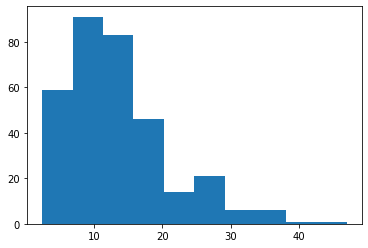

In [3]:
all_lifexp = zooanimals["Overall MLE"]
plt.hist(all_lifexp)
plt.show()

We are interested in the data about Mammals. So we make a subset of the dataset in which `TaxonClass == Mammalia` and call it "Mammalia".

In [8]:
Mammalia = zooanimals.loc[zooanimals['TaxonClass'] == 'Mammalia']
Mammalia

,Species Common Name,Scientific Name,TaxonClass,Overall Sample Size,Overall MLE,Overall CI - lower,Overall CI - upper,Male Sample Size,Male MLE,Male CI - lower,Male CI - upper,Female Sample Size,Female MLE,Female CI - lower,Female CI - upper,Male Data Deficient,Female Data Deficient
0,Addax,Addax nasomaculatus,Mammalia,1215.0,13.4,12.4,14.5,558.0,12.3,10.5,14.7,656.0,14.4,13.0,15.1,NaN,NaN
1,"Agouti, Brazilian",Dasyprocta leporina,Mammalia,456.0,8.1,7.2,9.3,216.0,8.8,6.9,10.3,220.0,7.8,6.8,8.6,NaN,NaN
3,"Anoa, Lowland",Bubalus depressicornis,Mammalia,256.0,17.7,15.3,21.2,113.0,16.3,14.7,21.3,139.0,18.8,15.2,21.5,yes,yes
4,"Anteater, Giant",Myrmecophaga tridactyla,Mammalia,177.0,19.7,17.1,21.5,86.0,19.4,17.1,21.5,90.0,19.7,16.2,22,yes,yes
5,"Antelope, Roan",Hippotragus equinus,Mammalia,456.0,12.5,11.5,13.2,210.0,12.7,10.6,16.5,245.0,12.4,10.8,13.1,yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,"Wolf, Mexican Gray",Canis lupus baileyi,Mammalia,514.0,11.0,10.5,12.1,263.0,11.0,10.1,12.1,251.0,11.3,10.1,13.4,NaN,NaN
324,"Wolf, Red",Canis rufus gregoryi,Mammalia,658.0,10.8,10.2,11.2,311.0,10.8,9.7,11.5,347.0,10.7,10.0,11.4,NaN,NaN
327,"Zebra, Grevy's",Equus grevyi,Mammalia,797.0,14.1,12.9,15.3,341.0,11.2,8.8,13.2,455.0,16.5,14.4,18,NaN,NaN
328,"Zebra, Hartmann's Mountain",Equus zebra hartmannae,Mammalia,585.0,13.9,12.3,15.3,283.0,12.3,10.8,13.9,301.0,15.4,13.2,17,NaN,NaN


We take the "Overall MLE" again and make a histogram of life expectancy values for Mammals.

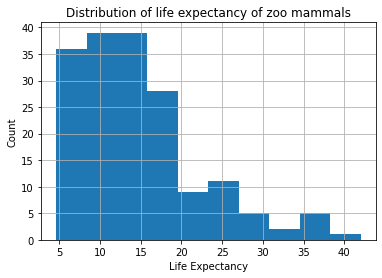

In [9]:
Mammalia_lifexp = Mammalia["Overall MLE"]
plt.hist(Mammalia_lifexp)
plt.title("Distribution of life expectancy of zoo mammals")
plt.xlabel("Life Expectancy")
plt.ylabel("Count")
plt.grid()
plt.show()

## Measurements of centre of data

### Mean

The purpose here is to find the mean of the life expectancy variable of the mammals. We can use the `np.mean` function to calculate this. Or sum up all the values using `np.sum` and divide them over the number of data values which is found using `len`.

In [10]:
Mammalia_mean = np.mean(Mammalia_lifexp)
Mammalia_mean

14.711428571428572

In [11]:
np.sum(Mammalia_lifexp)/len(Mammalia_lifexp)

14.711428571428572

### Median

In order to find median of this variable, `np.median` is used. Or we can sort all the values using `sort_values()` which sorts the 175 values from smallest to largest. Since this number is odd,  median is the middle point which is the 88th observation out of the 175 of them (considering the index in python starts from 0, that would be the 87th element).

In [12]:
np.median(Mammalia_lifexp)

13.2

In [13]:
Mammalia_lifexp.sort_values()

70      4.6
86      4.7
240     5.0
109     5.1
116     5.2
       ... 
130    35.5
28     35.6
90     36.3
49     36.3
91     42.0
Name: Overall MLE, Length: 175, dtype: float64

In [15]:
Mammalia_median = Mammalia_lifexp.sort_values().iloc[87]
Mammalia_median

13.2

### Mode

The life expectancy is a continous variable and mode is not informative for it. However we can find mode of the nomial variable 'TaxonClass'. The function `value_counts()` shows all the levels of the variable and their frequencies, which indicated what the mode is. Or instead we can import the `statistics` module and use the `mode` function. 

In [ ]:
zooanimals['TaxonClass'].value_counts()

In [ ]:
# The statistics module provides functions to mathematical statistics of numeric data.
import statistics
statistics.mode(zooanimals['TaxonClass'])

We can mark these summary values in the histogram plot.

In [ ]:
plt.hist(Mammalia_lifexp)
plt.title("Distribution of life expectancy of zoo mammals")
plt.xlabel("Life Expectancy")
plt.ylabel("Count")
plt.grid()
plt.axvline(x=Mammalia_mean, color='k', label="mean")
plt.axvline(x=Mammalia_median, color='r', label="median")
plt.legend()
plt.show()

## Measures of spread of data

### Range

Finding the range of the values of the selected variable is straihforward using `sort_values()`. Or `np.ptp` can be used instead. 

In [ ]:
Mammalia_lifexp.sort_values()

In [ ]:
np.ptp(Mammalia_lifexp)

### Variance

The most important measurement of spread of the data is variance which is calculated using `np.var`.

In [ ]:
Mammalia_var = np.var(Mammalia_lifexp)
print(Mammalia_var)

We can directly follow the variance formula and calculate its value by "(1) find deviations – (2) square them – (3) sum them up – (4) average them". 

In [ ]:
#1
distance = Mammalia_lifexp - np.mean(Mammalia_lifexp)
#2
sq_distance = distance ** 2
#3
sum_sq_distance = np.sum(sq_distance)
#4
variance = sum_sq_distance / (len(Mammalia_lifexp)-1)
print(variance)

The other measurment of variation is standard deviation which is just the square root of variance. Square root of variance can be used or the `np.std` function which calcutes the standard deviation directly.

In [ ]:
np.sqrt(Mammalia_var)

In [ ]:
np.std(Mammalia_lifexp)

## Quantiles and boxplots

Any quantiles of the selected variable can be calculated using `np.quantiles`. Usually we check the minimum, 25%, 50%, 75% and maximum of the data. 

In [ ]:
print(np.quantile(Mammalia_lifexp, [0, 0.25, 0.5, 0.75, 1]))

A useful function is `describe()` which gives a descriptive summary  of the variable.

In [ ]:
Mammalia_lifexp.describe()

A "boxplot" is a very informative way of showing the spread of data and the quartiles.

In [ ]:
plt.boxplot(Mammalia_lifexp)
plt.xlabel("Mammalia")
plt.ylabel("Life expectancy")
plt.show()

### Outliers

The boxplot shows a few of outliers in the variable with small circles. We can investigate the data and find out which animals are outliers in this variable. The interquantile range is directly calculated using `iqr` function from `scpy.stats` module. Then the upper and lower threshold of the data are calculated. Any data element smaller than the lower threshold `or` larger than the upper threshold are outliers. 

In [ ]:
from scipy.stats import iqr
IQR = iqr(Mammalia_lifexp)
lower_threshold = np.quantile(Mammalia_lifexp, 0.25) - 1.5 * IQR
upper_threshold = np.quantile(Mammalia_lifexp, 0.75) + 1.5 * IQR
outliers = Mammalia_lifexp[(Mammalia_lifexp < lower_threshold) | (Mammalia_lifexp > upper_threshold)]
print(outliers)

In [ ]:
(lower_threshold, upper_threshold)

Extract rows of data corresponding to the outliers.

In [ ]:
Mammalia.loc[Mammalia["Overall MLE"] > upper_threshold]

# Exercises

1. Let's focus on birds in this data set. Make a subset of the data in which `TaxonClass == Aves` (Aves animals are mainly birds). Take the column `Overall MLE` of the data which contains birds life expectancy and name it `birds_lifexp`. Since this column has some NaN values use `birds_lifexp = birds_lifexp.dropna()` to drop them. Make a histogram of the life expectancy of birds.

2. Calculate the summary statistics for the birds life expectancy. That is, measurments of centre of the data (mean, mode) and spread of data (range, variance, standard deviation).

3. Make a boxplot of the variable and calculate the quartiles.

4. The boxplot shows some outliers. Find what birds are outliers in terms of their life expectancy.

5. Write a paragraph and compare the life expectancy of mammals and birds.